# Introduction

Today we'll dive deep into a dataset all about LEGO. From the dataset we can ask whole bunch of interesting questions about the history of the LEGO company, their product offering, and which LEGO set ultimately rules them all:

<ul type="square">
<li>What is the most enormous LEGO set ever created and how many parts did it have?</li>

<li>How did the LEGO company start out? In which year were the first LEGO sets released and how many sets did the company sell when it first launched?</li>

<li>Which LEGO theme has the most sets? Is it one of LEGO's own themes like Ninjago or a theme they licensed liked Harry Potter or Marvel Superheroes?</li>

<li>When did the LEGO company really expand its product offering? Can we spot a change in the company strategy based on how many themes and sets did it released year-on-year?</li>

<li>Did LEGO sets grow in size and complexity over time? Do older LEGO 
sets tend to have more or fewer parts than newer sets?</li>
</ul>

**Data Source**

[Rebrickable](https://rebrickable.com/downloads/) has compiled data on all the LEGO pieces in existence. I recommend you use download the .csv files provided in this lesson. 

<img src='assets/bricks.jpg'>

# Import Statements

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


# Data Exploration

**Challenge**: How many different colours does the LEGO company produce? Read the colors.csv file in the data folder and find the total number of unique colours. Try using the [.nunique() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html?highlight=nunique#pandas.DataFrame.nunique) to accomplish this.

In [14]:
colors_df = pd.read_csv('data/colors.csv')
colors_df = colors_df.dropna()

val = colors_df.nunique(axis= 0,dropna=True)
print(val.rgb)

124


**Challenge**: Find the number of transparent colours where <code>is_trans == 't'</code> versus the number of opaque colours where <code>is_trans == 'f'</code>. See if you can accomplish this in two different ways.

In [23]:
trans_table = colors_df.groupby('is_trans').count()



transparent colors: 107
opaque colors: 28


In [24]:
print(f'transparent colors: {trans_table.iloc[0].id}')
print(f'opaque colors: {trans_table.iloc[1].id}')

transparent colors: 107
opaque colors: 28


**Challenge**: Change this into an h3 section heading:

<h3> Understanding LEGO Themes vs. LEGO Sets </h3> 

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

**Challenge**: Display this image: https://i.imgur.com/aKcwkSx.png

<img src='assets/lego_themes.png'>

A lego set is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

**Challenge**: Display this image https://i.imgur.com/whB1olq.png 

<img src= 'assets/lego_sets.png'>

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

**Challenge**: Read the sets.csv data and take a look at the first and last couple of rows. 

In [28]:
sets_df = pd.read_csv('data/sets.csv')
sets_df = sets_df.dropna()



  set_num                        name  year  theme_id  num_parts
0   001-1                       Gears  1965         1         43
1  0011-2           Town Mini-Figures  1978        84         12
2  0011-3  Castle 2 for 1 Bonus Offer  1987       199          0
3  0012-1          Space Mini-Figures  1979       143         12
4  0013-1          Space Mini-Figures  1979       143         12
           set_num                                 name  year  theme_id  \
15705      wwgp1-1  Wild West Limited Edition Gift Pack  1996       476   
15706   XMASTREE-1                       Christmas Tree  2019       410   
15707      XWING-1                  Mini X-Wing Fighter  2019       158   
15708      XWING-2                    X-Wing Trench Run  2019       158   
15709  YODACHRON-1      Yoda Chronicles Promotional Set  2013       158   

       num_parts  
15705          0  
15706         26  
15707         60  
15708         52  
15709        413  


In [29]:
print(sets_df.head())

  set_num                        name  year  theme_id  num_parts
0   001-1                       Gears  1965         1         43
1  0011-2           Town Mini-Figures  1978        84         12
2  0011-3  Castle 2 for 1 Bonus Offer  1987       199          0
3  0012-1          Space Mini-Figures  1979       143         12
4  0013-1          Space Mini-Figures  1979       143         12


In [31]:
print(sets_df.tail())

           set_num                                 name  year  theme_id  \
15705      wwgp1-1  Wild West Limited Edition Gift Pack  1996       476   
15706   XMASTREE-1                       Christmas Tree  2019       410   
15707      XWING-1                  Mini X-Wing Fighter  2019       158   
15708      XWING-2                    X-Wing Trench Run  2019       158   
15709  YODACHRON-1      Yoda Chronicles Promotional Set  2013       158   

       num_parts  
15705          0  
15706         26  
15707         60  
15708         52  
15709        413  


**Challenge**: In which year were the first LEGO sets released and what were these sets called?

In [55]:
min_val = sets_df['year'].min()
first_sets = sets_df[sets_df.year == min_val]
first_sets[['name', 'year']]


,name,year
9521,Extra-Large Gift Set (ABB),1949
9534,Large Gift Set (ABB),1949
9539,Medium Gift Set (ABB),1949
9544,Small Brick Set (ABB),1949
9545,Small Doors and Windows Set (ABB),1949


**Challenge**: How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [58]:
print(first_sets)
first_sets['num_parts'].sum()

      set_num                               name  year  theme_id  num_parts
9521  700.1-1         Extra-Large Gift Set (ABB)  1949       365        142
9534  700.2-1               Large Gift Set (ABB)  1949       365        178
9539  700.3-1              Medium Gift Set (ABB)  1949       365        142
9544  700.A-1              Small Brick Set (ABB)  1949       371         24
9545  700.B-1  Small Doors and Windows Set (ABB)  1949       371         12


498

**Challenge**: Find the top 5 LEGO sets with the most number of parts. 

In [61]:
sets_df.sort_values('num_parts', ascending=False).head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


**Challenge**: Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

In [90]:
sets_by_year = sets_df.groupby('year').count()
set_1955 = sets_by_year.iloc[4]
set_2019 = sets_by_year.iloc[68]
print(f'difference in sets :{set_2019.set_num - set_1955.set_num}')



difference in sets :812


**Challenge**: Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames. 

year
1953      4
1954     14
1955     28
1956     13
1957     20
       ... 
2016    757
2017    786
2018    816
2019    840
2020    674
Name: set_num, Length: 68, dtype: int64


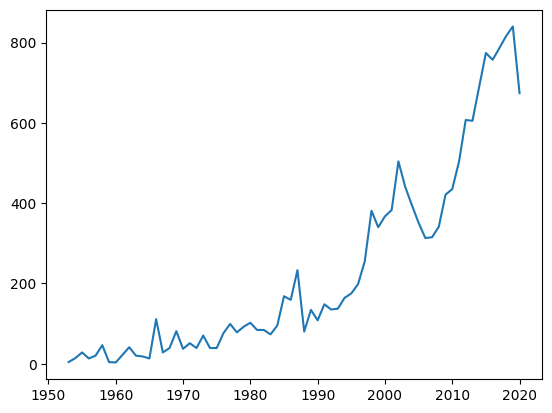

In [99]:
data_set = sets_by_year.set_num[2:-1]
print(data_set)
plt.plot(data_set)

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [109]:
themes_by_year = sets_df.groupby('year').agg({f'theme_id': pd.Series.nunique})
themes_by_year.rename(columns = {'theme_id':'nr_themes'}, inplace = True)
print(themes_by_year)

      nr_themes
year           
1949          2
1950          1
1953          2
1954          2
1955          4
...         ...
2017         89
2018         93
2019         78
2020         82
2021          1

[71 rows x 1 columns]


**Challenge**: Plot the number of themes released by year on a line chart. Only include the full calendar years (i.e., exclude 2020 and 2021). 

      nr_themes
year           
1949          2
1950          1
1953          2
1954          2
1955          4
...         ...
2015         98
2016         92
2017         89
2018         93
2019         78

[69 rows x 1 columns]


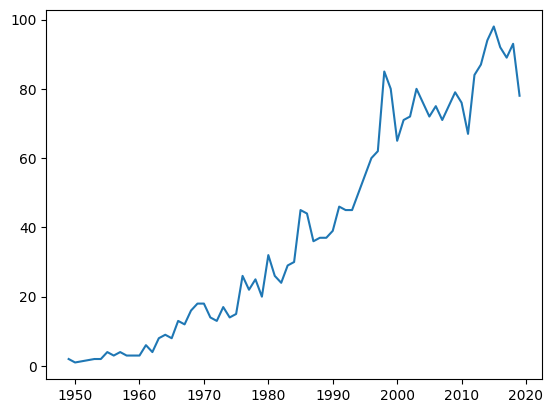

In [111]:
data_set = themes_by_year[:-2]
print(data_set)
plt.plot(data_set)

### Line Charts with Two Seperate Axes

**Challenge**: Use the <code>.groupby()</code> and <code>.agg()</code> function together to figure out the average number of parts per set. How many parts did the average LEGO set released in 1954 compared to say, 2017?

In [120]:
themes_by_year = sets_df.groupby('year').agg({f'num_parts': pd.Series.mean})[:-1]
themes_by_year.num_parts = themes_by_year.num_parts.round(2)
themes_by_year.rename(columns = {'num_parts':'avg_nr_parts'}, inplace = True)

In [125]:
print(themes_by_year.head())
print(themes_by_year.tail())

val1 = themes_by_year.iloc[3]
val2 = themes_by_year.iloc[66]

print(val1.avg_nr_parts - val2.avg_nr_parts)

      avg_nr_parts
year              
1949         99.60
1950          1.00
1953         13.50
1954         12.36
1955         36.61
      avg_nr_parts
year              
2016        209.92
2017        221.84
2018        213.62
2019        207.51
2020        259.73
-209.48000000000002


### Scatter Plots in Matplotlib

**Challenge**: Has the size and complexity of LEGO sets increased over time based on the number of parts? Plot the average number of parts over time using a Matplotlib scatter plot. See if you can use the [scatter plot documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html) before I show you the solution. Do you spot a trend in the chart? 

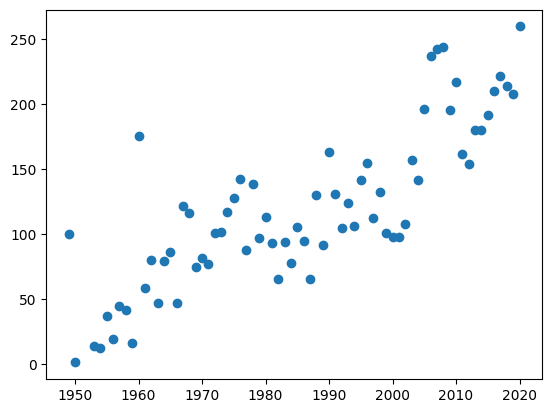

In [137]:

plt.scatter(x=themes_by_year.index, y=themes_by_year['avg_nr_parts'])
# plt.scatter()

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? 

In [157]:
index = sets_df['theme_id'].idxmax()

franchise_most_sets = sets_df.iloc[index]

print(franchise_most_sets)

print('-------------------')

sets_theme_count = sets_df['theme_id'].value_counts()
sets_df[sets_df.theme_id == 158]


set_num                           31197-1
name         Andy Warhol's Marilyn Monroe
year                                 2020
theme_id                              709
num_parts                            3341
Name: 3443, dtype: object
-------------------


,set_num,name,year,theme_id,num_parts
850,11912-1,Star Wars: Build Your Own Adventure,2016,158,73
855,11920-1,Parts for Star Wars Build Your Own Adventure: ...,2019,158,70
1717,20006-1,Clone Turbo Tank - Mini,2008,158,64
1728,20007-1,Republic Attack Cruiser - Mini,2009,158,84
1738,20009-1,AT-TE Walker - Mini,2009,158,94
...,...,...,...,...,...
15686,VP-4,Star Wars Co-Pack of 7101 7111 and 7171,2000,158,0
15689,VP-8,Star Wars Co-Pack of 7130 and 7150,2000,158,0
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52


**Challenge** Use what you know about HTML markup and tags to display the database schema: https://i.imgur.com/Sg4lcjx.png

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv. 

**Challenge**: Explore the themes.csv. How is it structured? Search for the name 'Star Wars'. How many <code>id</code>s correspond to this name in the themes.csv? Now use these <code>id</code>s and find the corresponding the sets in the sets.csv (Hint: you'll need to look for matches in the <code>theme_id</code> column)

In [177]:
themes_df = pd.read_csv('data/themes.csv')
themes_df.rename(columns={'id':'theme_id'})
print(themes_df)

      id                   name  parent_id
0      1                Technic        NaN
1      2         Arctic Technic        1.0
2      3            Competition        1.0
3      4         Expert Builder        1.0
4      5                  Model        1.0
..   ...                    ...        ...
591  705               Iron Man      696.0
592  706             Spider-Man      696.0
593  707                  X-Men      696.0
594  708  The LEGO Batman Movie      697.0
595  709               LEGO Art        NaN

[596 rows x 3 columns]


In [178]:
star_wars = themes_df[themes_df.name=="Star Wars"]
star_wars_theme_id = star_wars.id.array
print(star_wars_theme_id)

<NumpyExtensionArray>
[18, 158, 209, 261]
Length: 4, dtype: int64


In [200]:
# sets_df[sets_df.theme_id == star_wars_theme_id]
sets_df[sets_df.theme_id.isin(star_wars_theme_id)].groupby('theme_id').count()

set_theme_count = sets_df["theme_id"].value_counts()
# print(set_theme_count[:])

# set_theme_count = pd.DataFrame({'id': sets_df.theme_count.index,
# 'set count': sets_df.theme_count.values})
print(set_theme_count)


theme_id
158    753
501    656
494    398
435    356
503    329
      ... 
307      1
215      1
361      1
210      1
414      1
Name: count, Length: 571, dtype: int64


AttributeError: 'Series' object has no attribute 'columns'

In [204]:
"""Merges all the tables using the key theme_id and right_index does something"""
result = sets_df.merge(themes_df, left_on='theme_id', right_index=True)
result.insert(0, "set_count", set_theme_count)
result[['theme_id', 'set_count', 'name_x']].sort_values('set_count')

,theme_id,set_count,name_x
515,473,1.0,4.5V Motor Set
414,504,1.0,All-in-One-Box-of-Fun
475,591,1.0,Princess Play Castle
215,397,1.0,Hobby Train
212,171,1.0,Millennium Falcon - UCS
...,...,...,...
15705,476,NaN,Wild West Limited Edition Gift Pack
15706,410,NaN,Christmas Tree
15707,158,NaN,Mini X-Wing Fighter
15708,158,NaN,X-Wing Trench Run


### Merging (i.e., Combining) DataFrames based on a Key
